# Multiclass-image-classification-with-ANN

Install Tensorflow

In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
print(tf.__version__)

2.0.0


Data preprocessing 

In [28]:
#import datasets
from tensorflow.keras.datasets import fashion_mnist

In [29]:
#loading datasets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  

In [30]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [31]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [32]:
#check the image pixel values (here for the conviniant it uses only the image (4))
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [33]:
#getting the lowest and the highest pixel values 
np.min(x_train), np.max(x_train)

(0, 255)

In [34]:
#getting the highest and the lowest lable (class) values
np.min(y_train), np.max(y_test)

(0, 9)

In [35]:
#check class names 
class_names = ['0 Top/T-shirt','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sanal','6 Shirt','7 Sneaker','8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sanal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


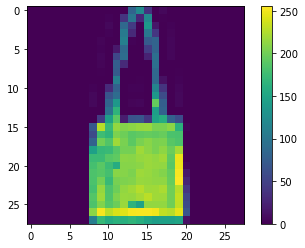

In [36]:
# data exploration 
plt.figure()
plt.imshow(x_train[200])
# colobar contains 0 to 255 colors
plt.colorbar()

In [37]:
name=(y_train[200])
print(class_names[name])

8 Bag


In [50]:
# normalazation values (Make it easy for the ANN to learn the model)
x_train= x_train/255.0
y_test= y_test/255.0

TypeError: Invalid shape (784,) for image data

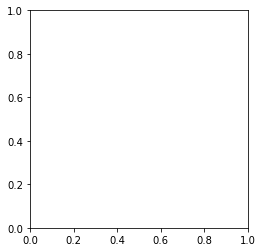

In [51]:
#now color values are spread between 0 and 1
# data exploration 
plt.figure()
plt.imshow(x_train[200])
# colobar contains 0 to 255 colors
plt.colorbar()

In [40]:
#flatten the datasets
#ANN takes values in 1d array. checking how data set is 
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [41]:
# Array is in 28*28 pixel photos, now it needs to convert to 1D array 
# -1 is to consider all the 60000 images, 28*28 to convert for the 1D array 
x_train= x_train.reshape(-1, 28*28 )
x_test = x_test.reshape(-1, 28*28)

In [42]:
# check the shape 
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [43]:
# define an objests (model) Sequential class becasue adding different layers 
model = tf.keras.models.Sequential()

In [44]:
# sequenceof layers
#adding first fully connected hidden layers
#  units (number of neurons)  = 128
# activation function = ReLu
# input shape = 784
model.add(tf.keras.layers.Dense(units = 128, activation = "relu", input_shape=(784,)))
# we keep comma after the 784 to make vector 

In [45]:
# adding the second layer with dropout (droupout is a regulization technique)
# drop out - randomly selected neuron are ignored, so backward, forward propergession are not going to consider 
# drop out - prevent the overfitting 
# normally dropout 20% to 50% neuorne
model.add(tf.keras.layers.Dropout(0.3))


In [46]:
# Adding the output layer
# units =10 (beacuse of having 10 classes)
# activaiton = softamx 
model.add(tf.keras.layers.Dense(units =10, activation='softmax'))

In [47]:
# comlining the model 
# 1 optiizers (minimize the loss function )
# 2 loss functon (act as a guide to the optimizer) sparse_catergorical_crossentropy
# 3 matrices (to get the accuracy) sparse_catergorical_accuarcy 
model.compile(optiizer='adam', loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

In [48]:
# check the model summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [49]:
#  train the model
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0016 - sparse_categorical_accuracy: 0.1000
Epoch 2/10
60000/60000 [==============================] - 10s 174us/sample - loss: 3.4709e-09 - sparse_categorical_accuracy: 0.1000
Epoch 3/10
60000/60000 [==============================] - 10s 172us/sample - loss: 9.4771e-10 - sparse_categorical_accuracy: 0.1000
Epoch 4/10
60000/60000 [==============================] - 10s 171us/sample - loss: 5.5829e-10 - sparse_categorical_accuracy: 0.1000
Epoch 5/10
60000/60000 [==============================] - 11s 175us/sample - loss: 5.9406e-10 - sparse_categorical_accuracy: 0.1000
Epoch 6/10
60000/60000 [==============================] - 11s 183us/sample - loss: 5.2849e-10 - sparse_categorical_accuracy: 0.1000
Epoch 7/10
60000/60000 [==============================] - 11s 180us/sample - loss: 6.2783e-10 - sparse_categorical_accuracy: 0.1000
Epoch 8/10
60000/60000 [==============================] -